In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gensim
import warnings
from gensim.models import FastText
import pickle

warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [16]:
dataset = pd.read_csv("Hotel_dataset.csv")
reviews = [w for w in dataset["Review"]]
tokenized_words = [gensim.utils.simple_preprocess(w) for w in reviews]

In [17]:
# fastText model
fastText = FastText(vector_size = 300, window = 5, min_count = 1,
 sentences = tokenized_words, epochs = 10)

In [18]:
# 10 most similar words to "hotel" - fastText
print(fastText.wv.most_similar('hotel'))

[('ihotel', 0.9491733908653259), ('dhotel', 0.9481085538864136), ('nhotel', 0.9470729827880859), ('ahotel', 0.9454997777938843), ('hotelis', 0.9214593768119812), ('hotelx', 0.9193196892738342), ('hotelif', 0.916719377040863), ('hoteli', 0.9149612188339233), ('hotelpro', 0.9137111902236938), ('hotel__', 0.9129489064216614)]


In [19]:
print("Similarity between the words 'hotel' " +
"and 'room' - fastText : ",
fastText.wv.similarity('hotel', 'room'))

Similarity between the words 'hotel' and 'room' - fastText :  0.22214374


In [21]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0, size), dtype = 'f')
    word_labels = [word]

    close_words = model.similar_by_word(word)
    
    arr = np.append(arr, np.array([model[word]]), axis = 0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis = 0)
        
        tsne = TSNE(n_components = 2, random_state = 0, perplexity = 1.0)
        np.set_printoptions(suppress = True)
        Y = tsne.fit_transform(arr)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy = (x, y), xytext = (0, 0), textcoords = 'offset points')
    plt.xlim(x_coords.min() + 0.00005, x_coords.max() + 0.00005)
    plt.ylim(y_coords.min() + 0.00005, y_coords.max() + 0.00005)
    plt.title("Top 10 closest words to 'hotel' - fastText", pad = 20)
    plt.show()

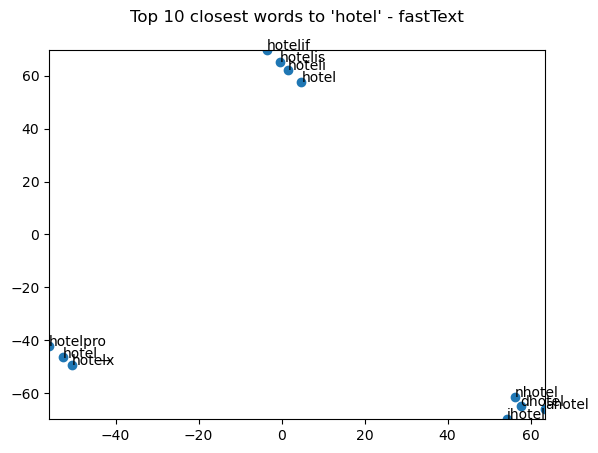

In [22]:
display_closestwords_tsnescatterplot(fastText.wv, 'hotel', 300)

In [23]:
def getWordVectorFastText(doc):
    return [fastText.wv[word] for word in doc if word in fastText.wv.index_to_key]

In [24]:
word_vectors_fastText = []
for i in range(len(tokenized_words)):
    word_vectors_fastText.append(getWordVectorFastText(tokenized_words[i]))

In [25]:
# saving the vectors to disk
pickle_out = open("fasttext_vectors.pickle", "wb")
pickle.dump(word_vectors_fastText, pickle_out)
pickle_out.close()